In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Improve plot aesthetics
sns.set(style="whitegrid")


In [3]:
# Load the dataset
file_path = "C:/Users/ketha/Downloads/portfolio_data.csv"
df = pd.read_csv(file_path)


       Date        AMZN        DPZ         BTC       NFLX
0  5/1/2013  248.229996  51.190983  106.250000  30.415714
1  5/2/2013  252.550003  51.987320   98.099998  30.641428
2  5/3/2013  258.049988  52.446388  112.900002  30.492857
3  5/6/2013  255.720001  53.205257  109.599998  30.098572
4  5/7/2013  257.730011  54.151505  113.199997  29.464285
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB
None


Visualization of Time Series
(Exploratory Data Analysis)

In [5]:
df.head(10)

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285
5,5/8/2013,258.679993,54.385727,112.800003,29.801428
6,5/9/2013,260.160004,54.020340,117.699997,30.915714
7,5/10/2013,263.630005,54.357620,115.639999,31.098572
8,5/13/2013,264.510010,54.573097,111.400002,32.768570
9,5/14/2013,268.329987,55.275757,114.220001,33.424286


In [6]:
df.tail(10)

,Date,AMZN,DPZ,BTC,NFLX
1510,5/1/2019,1911.520020,271.459991,5500.720215,378.809998
1511,5/2/2019,1900.819946,274.320007,5753.379883,379.059998
1512,5/3/2019,1962.459961,279.750000,5840.080078,385.029999
1513,5/6/2019,1950.550049,282.019989,5819.569824,378.670013
1514,5/7/2019,1921.000000,277.390015,5998.709961,370.459991
1515,5/8/2019,1917.770020,283.149994,6171.959961,364.369995
1516,5/9/2019,1899.869995,282.160004,6358.290039,362.750000
1517,5/10/2019,1889.979980,278.369995,7191.359863,361.040009
1518,5/13/2019,1822.680054,273.880005,7980.129883,345.260010
1519,5/14/2019,1840.119995,272.859985,8183.830078,345.609985


In [8]:
# Display summary info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1520 entries, 2013-05-01 to 2019-05-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1520 non-null   float64
 1   DPZ     1520 non-null   float64
 2   BTC     1520 non-null   float64
 3   NFLX    1520 non-null   float64
dtypes: float64(4)
memory usage: 59.4 KB
None


In [7]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Check for and handle missing values
print(df.isnull().sum())
df.dropna(inplace=True)  # or use df.fillna(method='ffill') to forward-fill missing values

# Show updated DataFrame info
print(df.info())


AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1520 entries, 2013-05-01 to 2019-05-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1520 non-null   float64
 1   DPZ     1520 non-null   float64
 2   BTC     1520 non-null   float64
 3   NFLX    1520 non-null   float64
dtypes: float64(4)
memory usage: 59.4 KB
None


In [4]:
df.columns

Index(['Date', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')

## Data Visualization


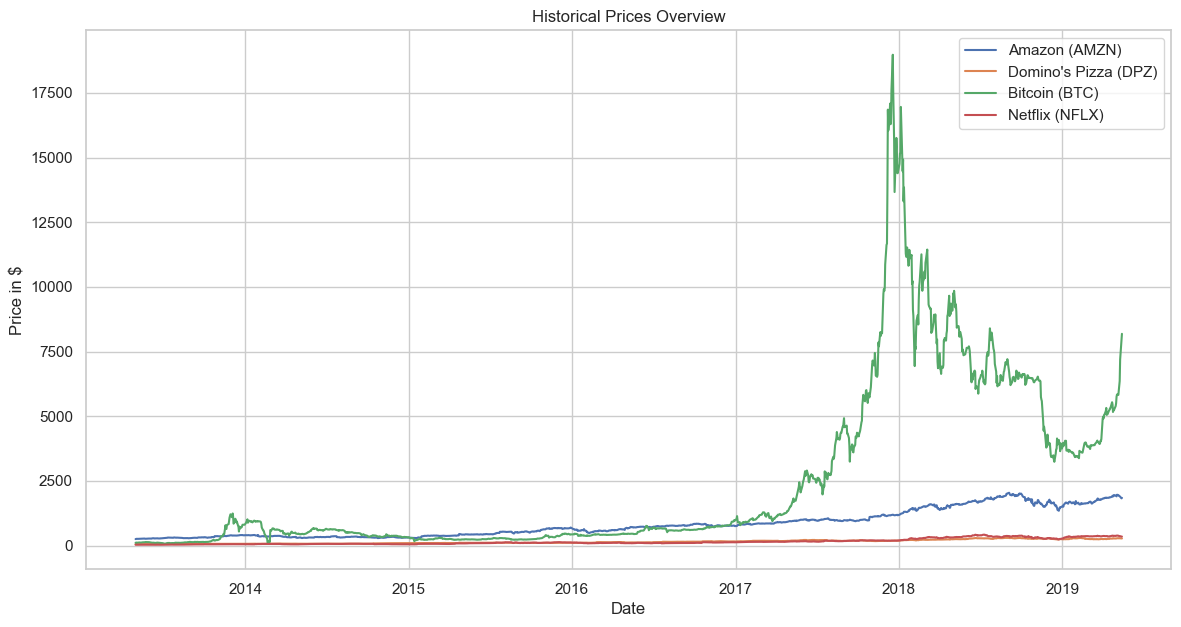

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Improve plot aesthetics
sns.set(style="whitegrid")

# Plotting the stock prices
plt.figure(figsize=(14, 7))
plt.plot(df['AMZN'], label='Amazon (AMZN)')
plt.plot(df['DPZ'], label="Domino's Pizza (DPZ)")
plt.plot(df['BTC'], label='Bitcoin (BTC)')
plt.plot(df['NFLX'], label='Netflix (NFLX)')
plt.title('Historical Prices Overview')
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.legend()
plt.show()



Time Series Decomposition

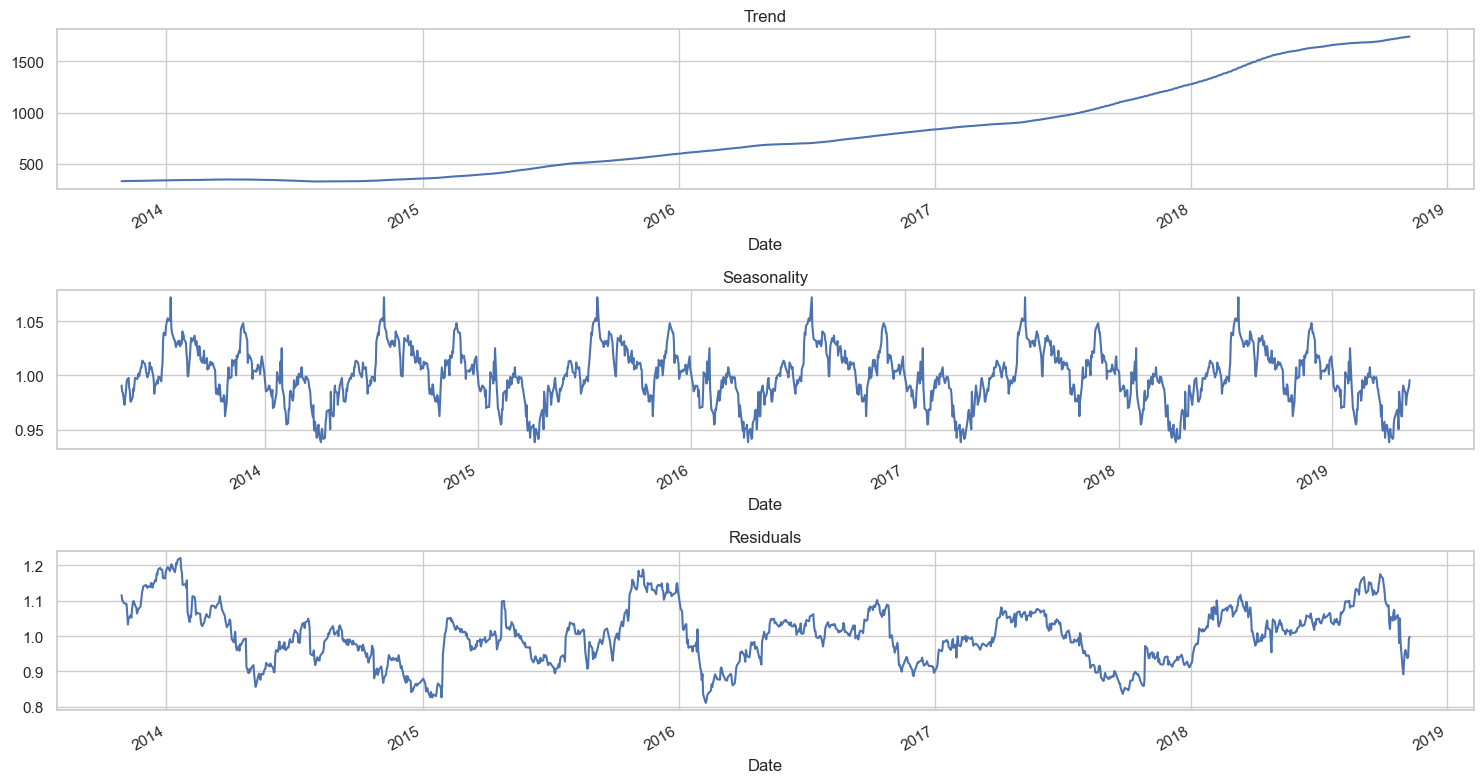

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Setting the period for decomposition (assuming approximately 252 business days per year)
decomposition_amzn = seasonal_decompose(df['AMZN'], model='multiplicative', period=252)

# Plotting the decomposed time series of Amazon
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 8))
decomposition_amzn.trend.plot(ax=ax1, title='Trend')
decomposition_amzn.seasonal.plot(ax=ax2, title='Seasonality')
decomposition_amzn.resid.plot(ax=ax3, title='Residuals')
plt.tight_layout()
plt.show()



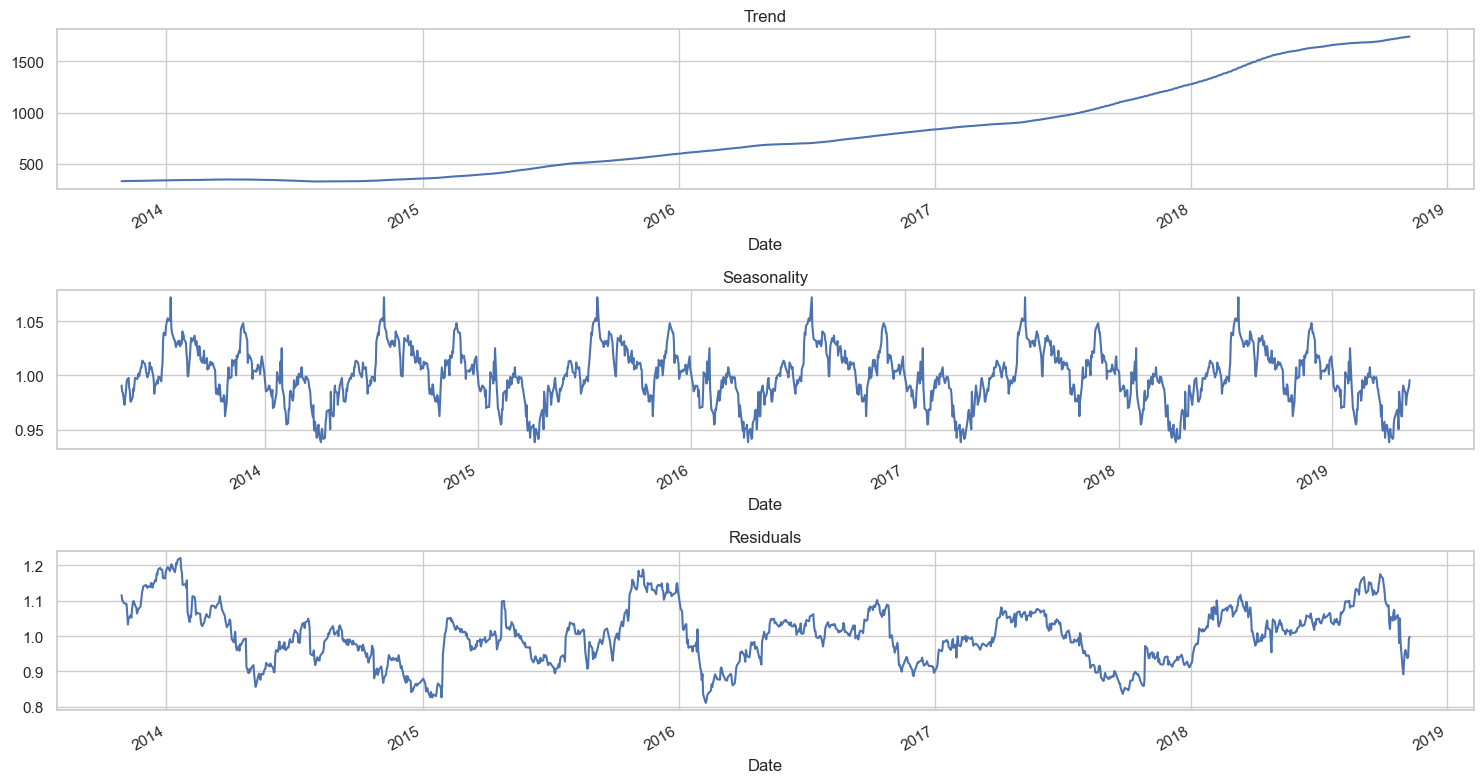

In [18]:
# Setting the period for decomposition (assuming approximately 252 business days per year)
decomposition_amzn = seasonal_decompose(df['AMZN'], model='multiplicative', period=252)

# Plotting the decomposed time series of Amazon
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 8))
decomposition_amzn.trend.plot(ax=ax1, title='Trend')
decomposition_amzn.seasonal.plot(ax=ax2, title='Seasonality')
decomposition_amzn.resid.plot(ax=ax3, title='Residuals')
plt.tight_layout()
plt.show()


In [28]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test:
adf_test = adfuller(df['AMZN'])

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Conclusion based on the p-value
if adf_test[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")



ADF Statistic: 0.553660
p-value: 0.986416
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Series is not stationary


## Autocorrelation and Partial Autocorrelation


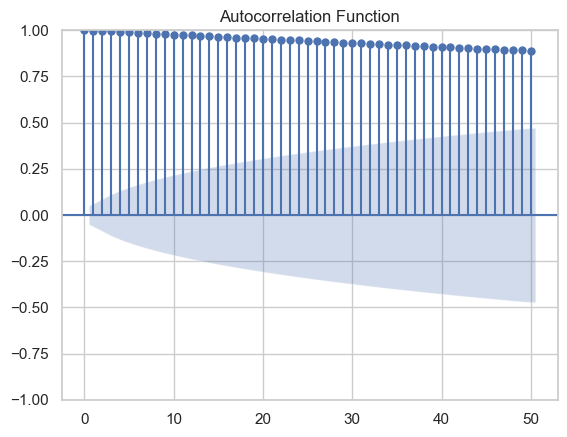

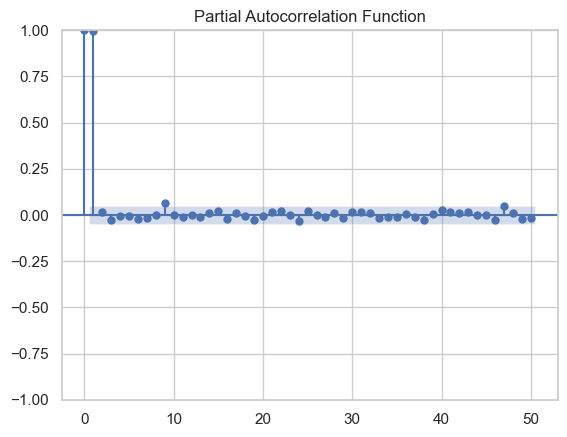

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation
plot_acf(df['AMZN'], lags=50)
plt.title('Autocorrelation Function')
plt.show()

# Partial Autocorrelation
plot_pacf(df['AMZN'], lags=50)
plt.title('Partial Autocorrelation Function')
plt.show()


## Autocorrelation and Partial Autocorrelation

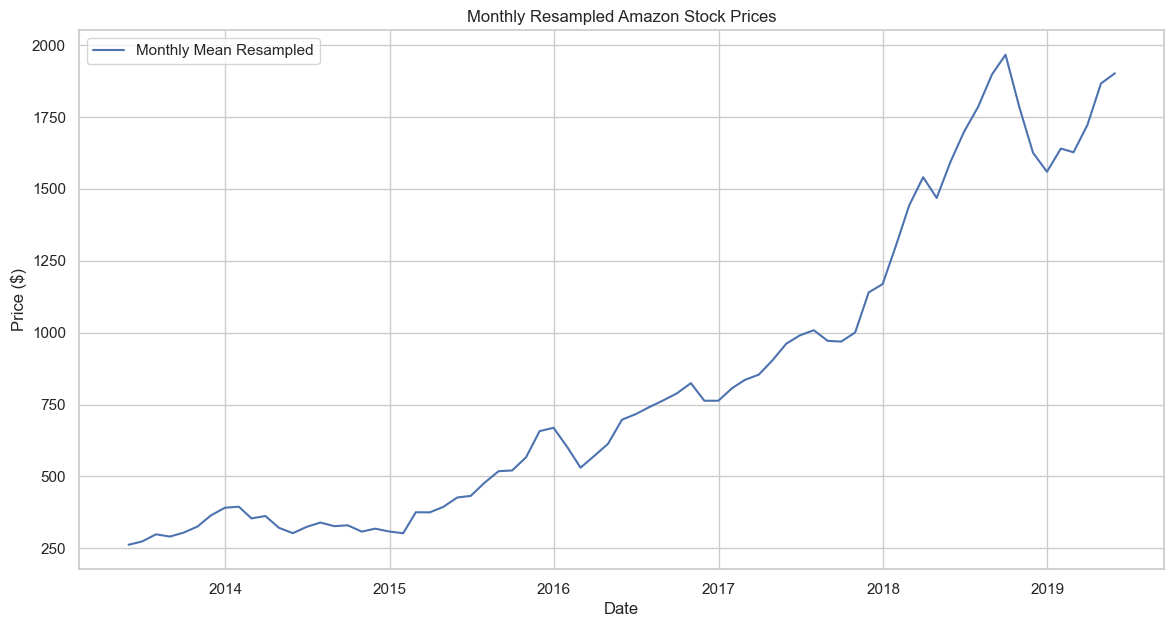

In [25]:
monthly_resampled_data = df['AMZN'].resample('M').mean()

plt.figure(figsize=(14, 7))
plt.plot(monthly_resampled_data, label='Monthly Mean Resampled')
plt.title('Monthly Resampled Amazon Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


 Resampling the Data

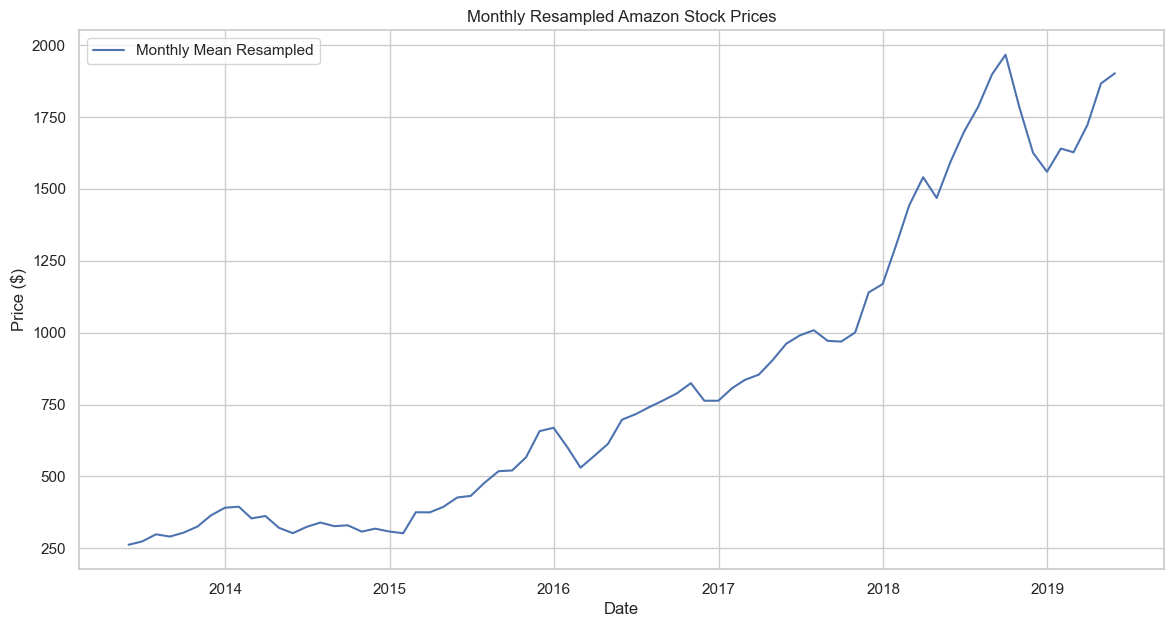

In [29]:
monthly_resampled_data = df['AMZN'].resample('M').mean()

plt.figure(figsize=(14, 7))
plt.plot(monthly_resampled_data, label='Monthly Mean Resampled')
plt.title('Monthly Resampled Amazon Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


ARIMA Model Selection and Training

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
# Example: ARIMA(1,1,1)
arima_model = ARIMA(monthly_resampled_data, order=(1, 1, 1))
arima_result = arima_model.fit()

print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:                   AMZN   No. Observations:                   73
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -393.626
Date:                Thu, 18 Apr 2024   AIC                            793.252
Time:                        21:47:12   BIC                            800.082
Sample:                    05-31-2013   HQIC                           795.971
                         - 05-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3336      0.206      1.619      0.105      -0.070       0.737
ma.L1          0.1300      0.192      0.678      0.498      -0.246       0.506
sigma2      3271.8865    413.549      7.912      0.0

## Forecasting

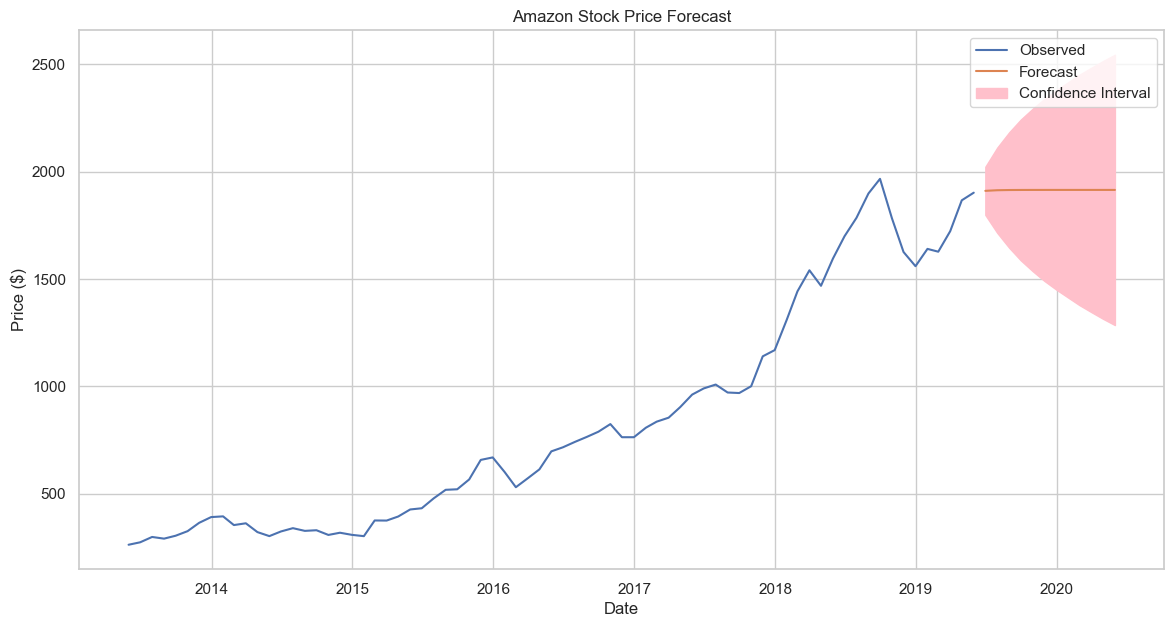

In [27]:
# Forecasting the next 12 months
forecast = arima_result.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

# Plotting the forecast
plt.figure(figsize=(14, 7))
plt.plot(monthly_resampled_data, label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', label='Confidence Interval')
plt.title('Amazon Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()
